In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import numpy as np
#import pickle
import cv2
import os
from os import listdir
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
#from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D
from keras.layers import Conv2D,Lambda
from keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
#from keras.optimizers import Adam
from keras.preprocessing import image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from numpy import expand_dims
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
#from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
#from torchvision import datasets, transforms, models
#from imutils import paths
#from keras.wrappers.scikit_learn import KerasRegressor
import glob
import tensorflow as tf

In [ ]:
tf.compat.v1.reset_default_graph
EPOCHS = 10
INIT_LR = 1e-3
batch_size = 32
img_rows, img_cols = 256, 256
# img_rows, img_cols = 120, 120
input_shape = (img_rows, img_cols, 3)
#image_size = 0
#directory_root = 'riceleafdataset'
#width=256
#height=256
#depth=1

# Train/Test dataset split

In [ ]:
data=[]
label_list = []
for filename in glob.glob('/content/drive/MyDrive/PR_Final_Project/Flower/flower_images/*/*.png'):
   #print(filename)
  print(os.path.basename(filename))
  only_file_name = os.path.basename(filename)## hispa_2_output.jpg
  train_img_label = only_file_name.split('_')[0]
  img = load_img(filename,target_size=(256, 256))

  img1 = img_to_array(img)
  data.append(img1)
  label_list.append(train_img_label)

np_data = np.array(data, dtype=np.float16)/255.0
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

lotus_img_2.png
lotus_img_3.png
lotus_img_4.png
lotus_img_1.png
lotus_img_7.png
lotus_img_8.png
lotus_img_10.png
lotus_img_6.png
lotus_img_9.png
lotus_img_5.png
flower_img_7.png
flower_img_14.png
flower_img_6.png
flower_img_15.png
flower_img_2.png
flower_img_11.png
flower_img_13.png
flower_img_1.png
flower_img_5.png
flower_img_4.png
flower_img_9.png
flower_img_3.png
flower_img_12.png
flower_img_8.png
flower_img_10.png
Lily_img_3.png
Lily_img_4.png
Lily_img_1.png
Lily_img_9.png
Lily_img_2.png
Lily_img_6.png
Lily_img_8.png
Lily_img_5.png
Lily_img_7.png
Lily_img_10.png
Rose_img_8.png
Rose_img_10.png
Rose_img_1.png
Rose_img_3.png
Rose_img_6.png
Rose_img_9.png
Rose_img_2.png
Rose_img_5.png
Rose_img_4.png
Rose_img_7.png
tulip_img_1.png
tulip_img_3.png
tulip_img_6.png
tulip_img_9.png
tulip_img_8.png
tulip_img_2.png
tulip_img_7.png
tulip_img_10.png
tulip_img_4.png
tulip_img_5.png


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_data, image_labels, test_size=0.30, random_state = 0)
classifier = Sequential()
#rbm = BernoulliRBM(random_state=0, verbose=True)

chanDim = -1

In [ ]:
#step - 1 - Convolution
classifier.add(Convolution2D(16, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Convolution2D(32, (3, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Convolution2D(64, (3, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(5))
classifier.add(Activation('softmax'))
classifier.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 254, 254, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,710,373 (14.15 MB)

 Trainable params: 3,710,373 (14.15 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the CNN

In [ ]:
# Compiling the CNN
classifier.compile(
    # optimizer='adam',
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    # loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Epoch Results

In [ ]:
# hist=classifier.fit( x_train,y_train,batch_size=32,verbose=1,nb_epoch=5,validation_data=(x_test,y_test))
hist = classifier.fit(x_train,y_train,batch_size=batch_size,epochs=EPOCHS,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1190 - loss: 1.9820 - val_accuracy: 0.1765 - val_loss: 2.5559
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 988ms/step - accuracy: 0.2237 - loss: 2.4228 - val_accuracy: 0.1765 - val_loss: 1.7442
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 654ms/step - accuracy: 0.2939 - loss: 1.7327 - val_accuracy: 0.1765 - val_loss: 1.7355
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 989ms/step - accuracy: 0.5735 - loss: 1.4117 - val_accuracy: 0.1765 - val_loss: 2.0173
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step - accuracy: 0.5175 - loss: 1.2979 - val_accuracy: 0.1765 - val_loss: 2.0486
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 685ms/step - accuracy: 0.3706 - loss: 1.7178 - val_accuracy: 0.2353 - val_loss: 1.7700
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 997ms/step - accuracy: 0.6190 - loss: 1.1139 - val_accuracy: 0.1176 - val_loss: 2.0779
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 653ms/step - accuracy: 0.5839 - loss: 1.2161 - val_accuracy: 0.2353 - val_loss: 2.

# Confusion Matrix

In [ ]:
#confusion_matrics
Y_pred = classifier.predict(x_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


In [ ]:
target_names = ['class 0(Lily_img)', 'class 1(Rose_img)', 'class 2(flower_img)','class 3(lotus_img)','class 4(tulip_img)']


# Prediction and classification_report

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names, zero_division=0))


                     precision    recall  f1-score   support

  class 0(Lily_img)       0.00      0.00      0.00         6
  class 1(Rose_img)       1.00      0.67      0.80         3
class 2(flower_img)       0.18      0.67      0.29         3
 class 3(lotus_img)       0.00      0.00      0.00         2
 class 4(tulip_img)       1.00      0.33      0.50         3

           accuracy                           0.29        17
          macro avg       0.44      0.33      0.32        17
       weighted avg       0.39      0.29      0.28        17



# Plot_confusion_matrix

In [ ]:
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

[[0 0 4 2 0]
 [0 2 1 0 0]
 [0 0 2 1 0]
 [0 0 2 0 0]
 [0 0 2 0 1]]


In [ ]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Plot non-normalized confusion matrix

Confusion matrix, without normalization
[[0 0 4 2 0]
 [0 2 1 0 0]
 [0 0 2 1 0]
 [0 0 2 0 0]
 [0 0 2 0 1]]


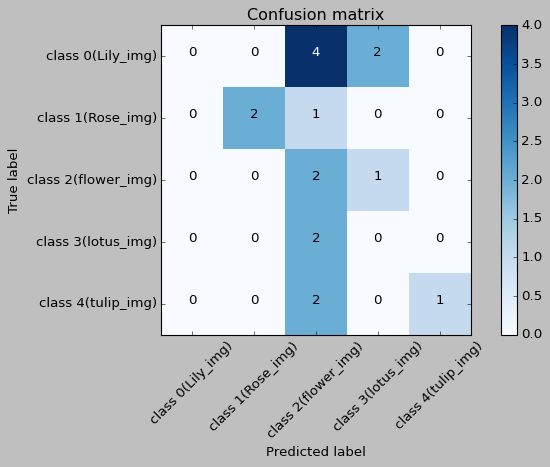

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

# Plot Diagram

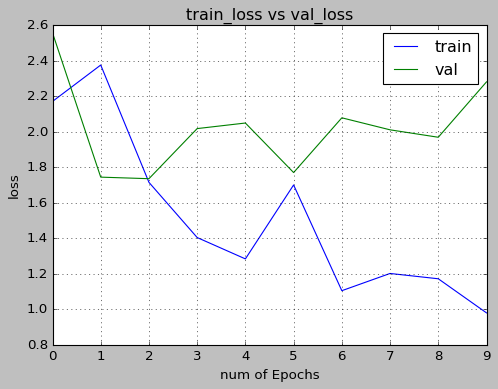

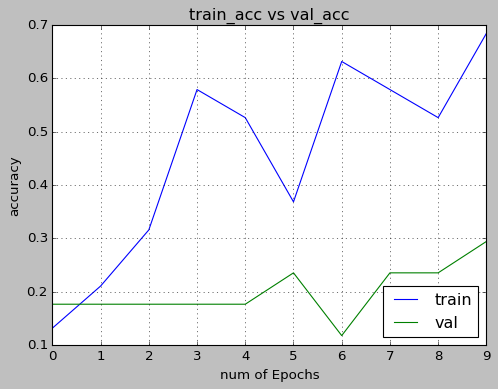

In [ ]:
plt.show()
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(10)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


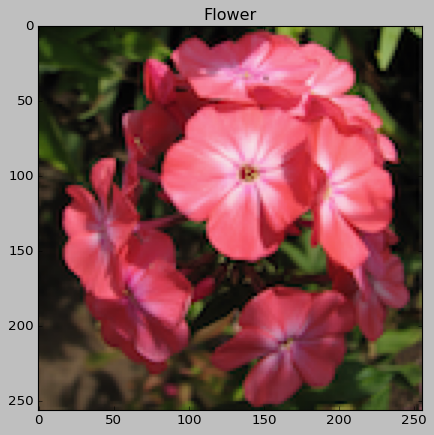

[[0. 0. 1. 0. 0.]]


In [ ]:
##load the image with the required shape
img = load_img('/content/drive/MyDrive/PR_Final_Project/Flower/flower_images/Lily_img/Lily_img_1.png', target_size=(256, 256))
# convert the image to an array
img1 = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img1 = expand_dims(img1, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img1 = img1/255.0
plt.show()
print(img1.shape)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes1 = classifier.predict(images, batch_size=32)
imgplot = plt.imshow(img)
plt.title('Flower')
plt.show()
print(classes1)